In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url, index_col='Month', parse_dates=True)
data.head()


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


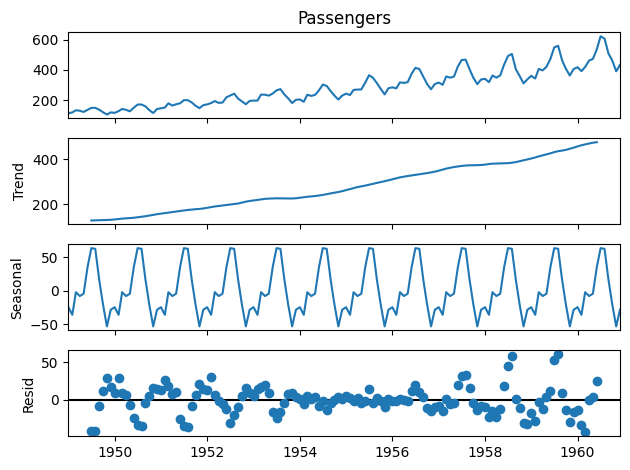

In [3]:
decomposition = seasonal_decompose(data['Passengers'], model='additive')
decomposition.plot()
plt.show()

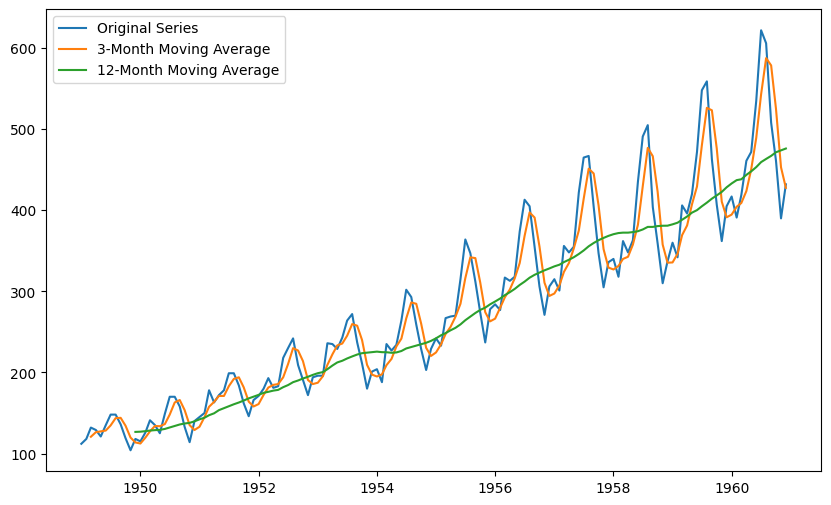

In [6]:
data['MA_3'] = data['Passengers'].rolling(window=3).mean()
data['MA_12'] = data['Passengers'].rolling(window=12).mean()

plt.figure(figsize=(10,6))
plt.plot(data['Passengers'], label='Original Series')
plt.plot(data['MA_3'], label='3-Month Moving Average')
plt.plot(data['MA_12'], label='12-Month Moving Average')
plt.legend(loc='best')
plt.show()


##### Check for the P-value

In [8]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 0.8153688792060482
p-value: 0.991880243437641


The ADF test is performed to check if the time series is stationary. A low p-value (typically < 0.05) indicates that the series is stationary, while a high p-value suggests that it is not.

### ARIMA Model

In [9]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Passengers'], order=(5,1,0))
model_fit = model.fit()

forecast = model_fit.forecast(steps=12)
print(forecast)


c:\Users\ranje\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ranje\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ranje\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1961-01-01    489.459724
1961-02-01    513.421772
1961-03-01    523.538287
1961-04-01    505.021116
1961-05-01    481.184566
1961-06-01    471.972591
1961-07-01    473.299157
1961-08-01    482.408891
1961-09-01    491.484806
1961-10-01    494.185151
1961-11-01    491.917082
1961-12-01    487.640959
Freq: MS, Name: predicted_mean, dtype: float64


An ARIMA model is fitted to the time series, and predictions for future values are made. The order of the ARIMA model is determined based on the dataset and the problem at hand.

## SARIMA

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
model = SARIMAX(data['Passengers'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


c:\Users\ranje\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ranje\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -506.149
Date:                            Fri, 16 Aug 2024   AIC                           1022.299
Time:                                    16:50:26   BIC                           1036.675
Sample:                                01-01-1949   HQIC                          1028.140
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1272      0.356     -0.357      0.721      -0.825       0.570
ma.L1         -0.2149      0.325   

A SARIMA model is used to capture both the regular and seasonal patterns in the time series. The summary provides insights into the model parameters and their significance.

## Time Series Forecasting

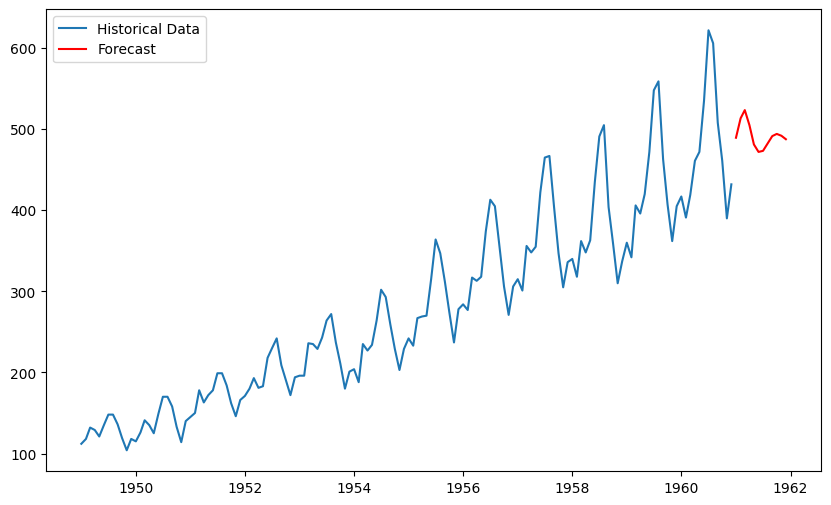

In [10]:
# Forecasting future values
forecast = model_fit.forecast(steps=12)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(data['Passengers'], label='Historical Data')
plt.plot(forecast, label='Forecast', color='red')
plt.legend(loc='best')
plt.show()


The forecast is plotted along with historical data to visualize the model's predictions. This helps in assessing the model's accuracy and reliability.

## Anomaly Detection

In [ ]:
import numpy as np

# Calculate Z-scores
data['z_score'] = (data['Passengers'] - data['Passengers'].mean()) / data['Passengers'].std()

# Identify anomalies
threshold = 3
anomalies = data[data['z_score'].abs() > threshold]

# Plot anomalies
plt.figure(figsize=(10,6))
plt.plot(data['Passengers'], label='Time Series')
plt.scatter(anomalies.index, anomalies['Passengers'], color='red', label='Anomalies')
plt.legend(loc='best')
plt.show()


Z-score is used to detect anomalies in the time series. Points that are significantly different from the mean (beyond a certain threshold) are marked as anomalies and plotted.